In [1]:
# Import library
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import *
from sklearn.metrics         import mean_squared_error
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute          import SimpleImputer
from sklearn.metrics         import classification_report
from sklearn                 import neighbors
from sklearn.preprocessing   import *
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition   import PCA
from sklearn.preprocessing   import StandardScaler
from sklearn.pipeline        import Pipeline
from sklearn.tree            import DecisionTreeClassifier
from sklearn.base            import BaseEstimator
from sklearn.ensemble        import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model    import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics         import f1_score
from sklearn.naive_bayes     import GaussianNB
from sklearn.compose         import ColumnTransformer
from sklearn.metrics import mean_squared_error
from math                    import sqrt
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_excel('/Users/apple/Desktop/cea/MODEL/rainstick_model.xlsx', engine='openpyxl')
df = df.iloc[: , 1:]

In [3]:
df['# Employees'].replace(['None','0 to 5', '5 to 10', '10 to 20','20+'],[0,1,2,3,4], inplace=True)
df['Website Rating'].replace(['1 - Poor, rudimentary website ', '2 - Basic design, few projects ', 
                              '3 - Beyond Basic with design and detailed project info',
                              '4 - Sophisticated Website, high quality, reviews'],[1,2,3,4], inplace=True)
df['Years in Biz'].replace(['0 to 5', '5 to 10', '10 to 15','15+'],[1,2,3,4], inplace=True)

df['Value of Home Built'].replace(['Primarily Starter Homes', 'Mostly Mid Value Homes',
                                   'Mix of Premium and Mid Value','Almost Exclusively Premium'],
                                  [1,2,3,4], inplace=True)

df['Trade Area'].replace(['Highly Local - Most Projects within 50 miles of main office', 
                          'Broad Coverage - Some Projects extend to 100 miles beyond main office',
                          'Regional - A few projects beyond 100 miles'],[3,2,1], inplace=True)

# df['Avg. Yelp Review Rating'].replace(['1. One Star', '2. Two Star', '3. Three Star',
#                                        '4. Four Star','5. Five Star'],[1,2,3,4,5], inplace=True)

df['Online Reviews on Buildzoom'].replace(['0', '< 5', '<15','15+'],[1,2,3,4], inplace=True)

df['Online Reviews on Google'].replace(['0','< 5', '< 15','15+'],[1,2,3,4], inplace=True)

df['Score- Level of Sophistication'].replace(['Lack sophistication - avg. FB/IG page, little /no social media activity',
                                              'Middling sophistication - decent FB/IG page, occasional social media activity',
                                              'Very sophisticated - good FB page, IG page, active social media content',
                                              'Super sophisticated- Great FB page, IG page, super high engagement on social a/c platforms '],
                                             [1,2,3,4], inplace=True)

df['Sustainability/Green Design'].replace(['Yes','No'],[1,0], inplace=True)
df['Do they do Commercial Work'].replace(['Yes','No','Yes, No'],[1,0,-1], inplace=True)
df['Is this a GC?'].replace(['Yes','No'],[1,0], inplace=True)
df['Sustainability, Environment, Renewable, Green, Water Conservation Focus'].replace(['Yes','No'],[1,0], inplace=True)
df['Is firm on Blue Book?'].replace(['Yes','No'],[1,0], inplace=True)
df['LinkedIn Presence'].replace(['Yes','No'],[1,0], inplace=True)
df['FB Presence'].replace(['Yes','No'],[1,0], inplace=True)
df['Instagram Presence'].replace(['Yes','No'],[1,0], inplace=True)
df['BuildZoom Profile Exists'].replace(['Yes','No'],[1,0], inplace=True)
df['Account on Houzz.com'].replace(['Yes','No'],[1,0], inplace=True)
df['Marketing or PM Position'].replace(['Yes','No'],[1,0], inplace=True)
df['if_sf'].replace(['Yes','No'],[1,0], inplace=True)





In [4]:
# le = preprocessing.LabelEncoder()
# ohe =preprocessing.OneHotEncoder()
# df['Type of Primary Services Offered - Must be listed on website'] = ohe.fit_transform(df['Type of Primary Services Offered - Must be listed on website'].values.reshape(-1,1))

# df['Type of Primary Services Offered - Must be listed on website'] = le.fit_transform(df['Type of Primary Services Offered - Must be listed on website'].values.reshape(-1,1))



In [6]:
df['length_topso']=df['Type of Primary Services Offered - Must be listed on website'].str.len()

In [7]:
df['length_topd']=df['Type of Projects Done'].str.len()

In [11]:
X = df.drop(['Enhanced Business Name','Type of Primary Services Offered - Must be listed on website',
             'Type of Projects Done','Total Tracked Views','Type of Projects Done','Avg. Yelp Review Rating'], axis=1)
y = df['Total Tracked Views']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,  random_state = 0)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(944, 24)
(944,)
(118, 24)
(118,)
(118, 24)
(118,)


(None, None)

In [12]:
regr = xgb.XGBRegressor()

regr.fit(X_train,y_train)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(X_valid)
# y_test = label_df
print("XGBoost score on validation set: ", sqrt(mean_squared_error(y_valid, y_pred)))

# Run prediction on the Kaggle test set.
# y_pred_xgb = regr.predict(test_df_munged)


XGBoost score on validation set:  1.0869894106208013


In [13]:

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': regr.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [14]:
importances

,Attribute,Importance
14,LinkedIn Presence,0.082237
11,Is this a GC?,0.070645
7,Online Reviews on Buildzoom,0.070040
19,Account on Houzz.com,0.056909
15,FB Presence,0.053698
2,# Employees,0.050301
20,Marketing or PM Position,0.050299
3,Website Rating,0.048138
21,if_sf,0.045403
10,Do they do Commercial Work,0.045244


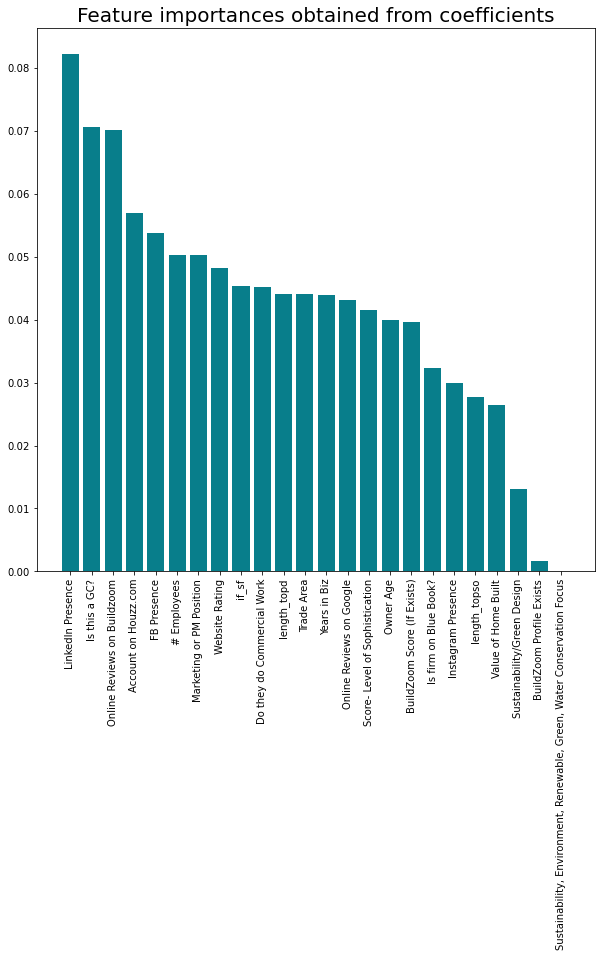

In [15]:

plt.figure(figsize=(10, 10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Logistic regression

In [18]:
# Create outcome variable for logistic regression
df['views']=[1 if i>0 else 0 for i in df['Total Tracked Views']]

In [19]:
df['Website Rating']=df['Website Rating'].fillna(0)

In [20]:
df.isna().sum()

Sustainability/Green Design                                                127
Total Tracked Views                                                          0
Enhanced Business Name                                                      41
Owner Age                                                                  554
Type of Primary Services Offered - Must be listed on website               263
# Employees                                                                341
Website Rating                                                               0
Years in Biz                                                               127
Trade Area                                                                  92
Type of Projects Done                                                      112
Value of Home Built                                                        185
Avg. Yelp Review Rating                                                    659
Online Reviews on Buildzoom                         

In [21]:
df1=df.fillna(df.mean())

In [22]:
df1.isna().sum()

Sustainability/Green Design                                                  0
Total Tracked Views                                                          0
Enhanced Business Name                                                      41
Owner Age                                                                    0
Type of Primary Services Offered - Must be listed on website               263
# Employees                                                                  0
Website Rating                                                               0
Years in Biz                                                                 0
Trade Area                                                                   0
Type of Projects Done                                                      112
Value of Home Built                                                          0
Avg. Yelp Review Rating                                                    659
Online Reviews on Buildzoom                         

In [23]:
X = df1.drop(['Enhanced Business Name','Type of Projects Done','Type of Primary Services Offered - Must be listed on website','Total Tracked Views','Avg. Yelp Review Rating','views'], axis=1)
y = df1['views']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,  random_state = 0)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(944, 24)
(944,)
(118, 24)
(118,)
(118, 24)
(118,)


(None, None)

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)

In [25]:
acc1=accuracy_score(y_valid, y_pred)
prec1=precision_score(y_valid, y_pred)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(acc1))
print('Precision of logistic regression classifier on validation set: {:.2f}'.format(prec1))

Accuracy of logistic regression classifier on validation set: 0.53
Precision of logistic regression classifier on validation set: 0.53


In [26]:
# confusion_matrix = confusion_matrix(y_valid, y_pred)
# print(confusion_matrix)
# print(classification_report(y_valid, y_pred))

In [27]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [28]:
importances

,Attribute,Importance
21,if_sf,0.303582
9,Score- Level of Sophistication,0.177757
3,Website Rating,0.177456
7,Online Reviews on Buildzoom,0.158904
17,BuildZoom Profile Exists,0.120672
16,Instagram Presence,0.115523
4,Years in Biz,0.113708
14,LinkedIn Presence,0.035992
5,Trade Area,0.019389
0,Sustainability/Green Design,0.003329


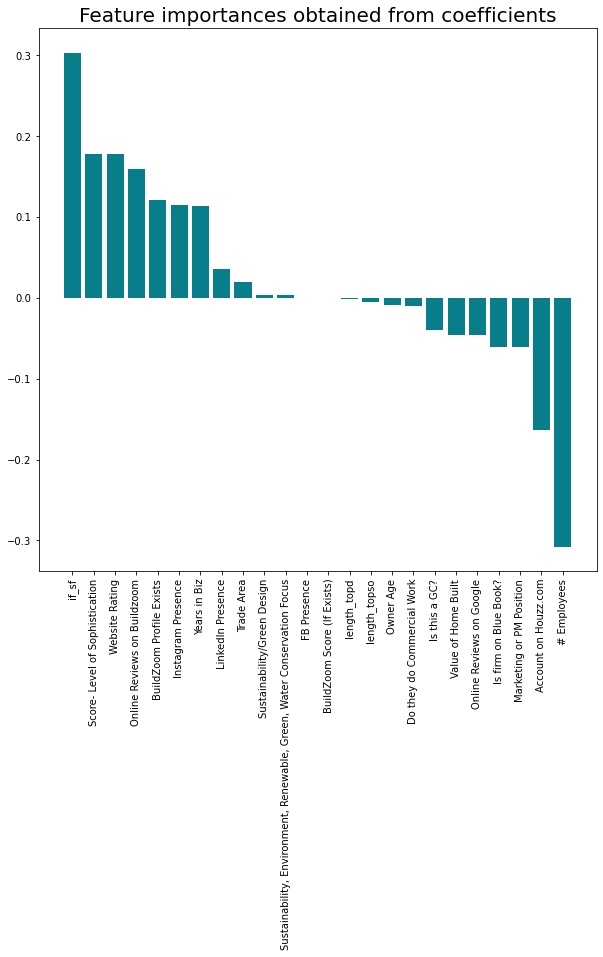

In [29]:
plt.figure(figsize=(10, 10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## SVM

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])
y_pred = clf.predict(X_valid)

acc2=accuracy_score(y_valid, y_pred)
prec2=precision_score(y_valid, y_pred)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(acc2))
print('Precision of logistic regression classifier on validation set: {:.2f}'.format(prec2))

Accuracy of logistic regression classifier on validation set: 0.57
Precision of logistic regression classifier on validation set: 0.60


## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)

acc3=accuracy_score(y_valid, y_pred_knn)
prec3=precision_score(y_valid, y_pred_knn)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(acc3))
print('Precision of logistic regression classifier on validation set: {:.2f}'.format(prec3))

Accuracy of logistic regression classifier on validation set: 0.43
Precision of logistic regression classifier on validation set: 0.39


## Decisiontree


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtclf = tree.DecisionTreeClassifier()
dtclf = dtclf.fit(X_train, y_train)
y_pred_dt = dtclf.predict(X_test)

acc4=accuracy_score(y_valid, y_pred_dt)
prec4=precision_score(y_valid, y_pred_dt)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(acc4))
print('Precision of logistic regression classifier on validation set: {:.2f}'.format(prec4))

Accuracy of logistic regression classifier on validation set: 0.47
Precision of logistic regression classifier on validation set: 0.44


## GaussianNB

In [33]:
from sklearn.naive_bayes import GaussianNB

gb=GaussianNB()
gb = gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

acc5=accuracy_score(y_valid, y_pred_gb)
prec5=precision_score(y_valid, y_pred_gb)
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(acc5))
print('Precision of logistic regression classifier on validation set: {:.2f}'.format(prec5))

Accuracy of logistic regression classifier on validation set: 0.49
Precision of logistic regression classifier on validation set: 0.49


In [34]:
data = {'Model':['Logistic','SVM','KNN n=5','Decision Tree', 'GaussianNB'],
        'Accuracy':[acc1, acc2, acc3, acc4,acc5],
        'Precision':[prec1, prec2, prec3, prec4,prec5]}
result = pd.DataFrame(data)
result

,Model,Accuracy,Precision
0,Logistic,0.525424,0.526316
1,SVM,0.567797,0.600000
2,KNN n=5,0.432203,0.391304
3,Decision Tree,0.466102,0.440000
4,GaussianNB,0.491525,0.485437
